## Create training datasets for decoder

2025-08-16 16:47:00.054669: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 16:47:00.077034: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-16 16:47:00.077052: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-16 16:47:00.077081: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-16 16:47:00.082201: I tensorflow/core/platform/cpu_feature_g

Sesison path: ../Data/t17/t17.2024.06.13/Typing
tfdata path: ../Data/t17/t17.2024.06.13/Typing


mat_to_tfrecord_V3.py input parameters:
	Session mat path: ../Data/t17/t17.2024.06.13/Typing
	Block numbers: [7, 8]
	Number of test trials: 40
	Trials to remove: {7: [0, 1, 2]}
	Channels to exclude: [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255]
	Channels to zero: []
	Include threshold crossings: True
	Inclu

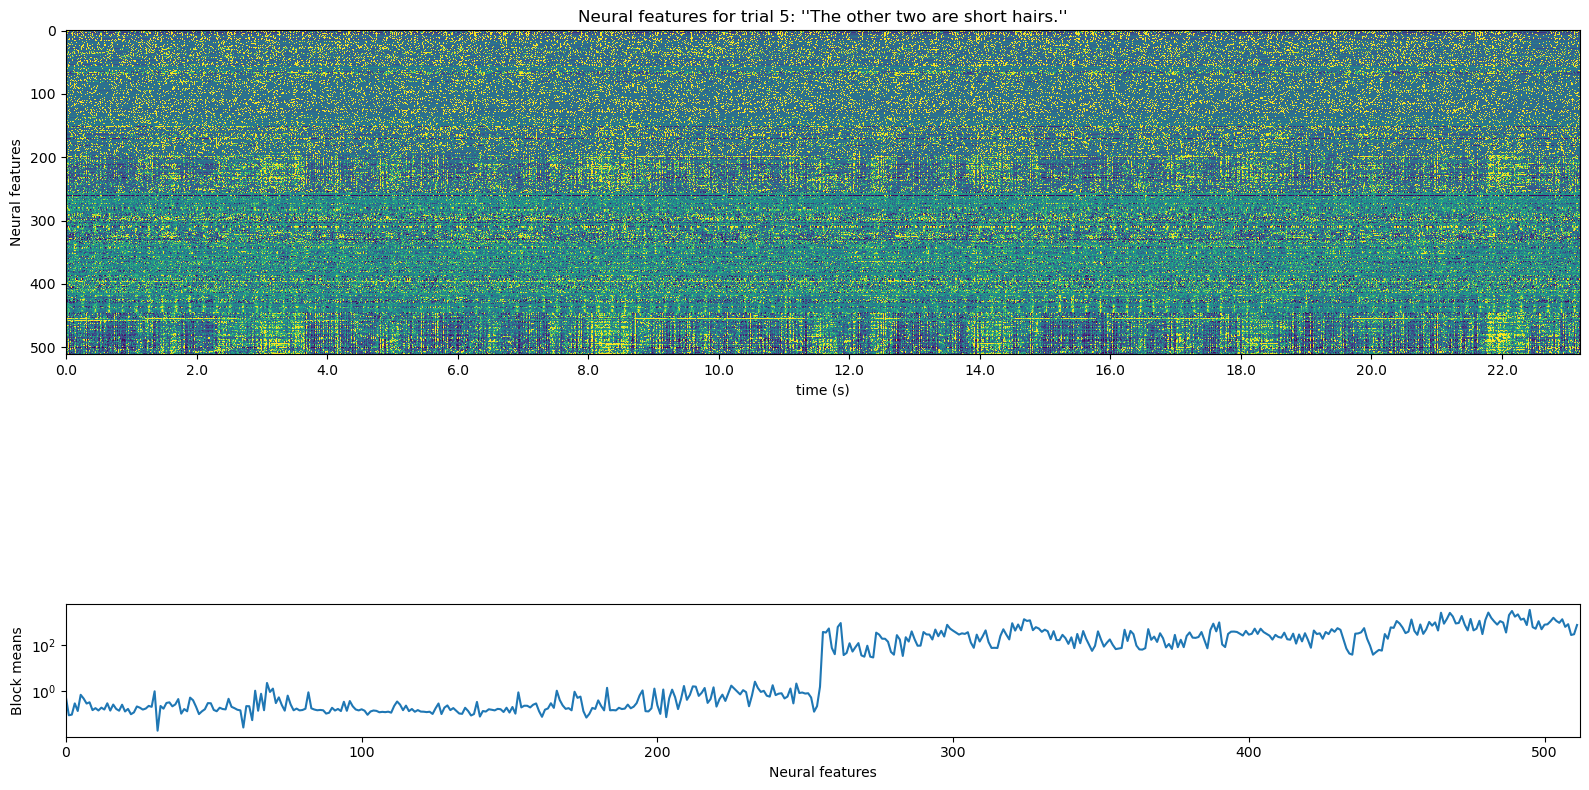

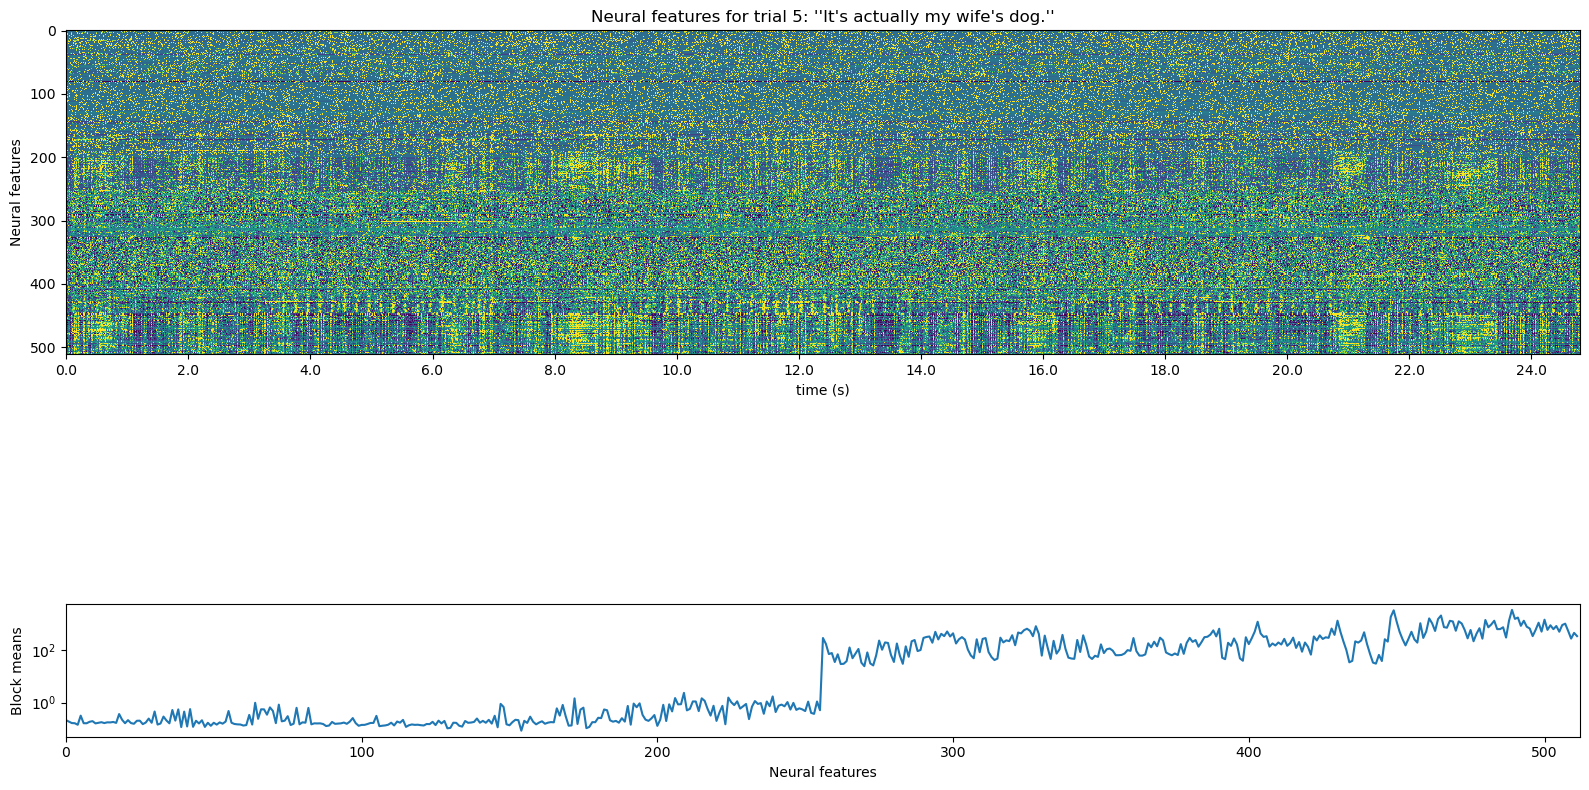

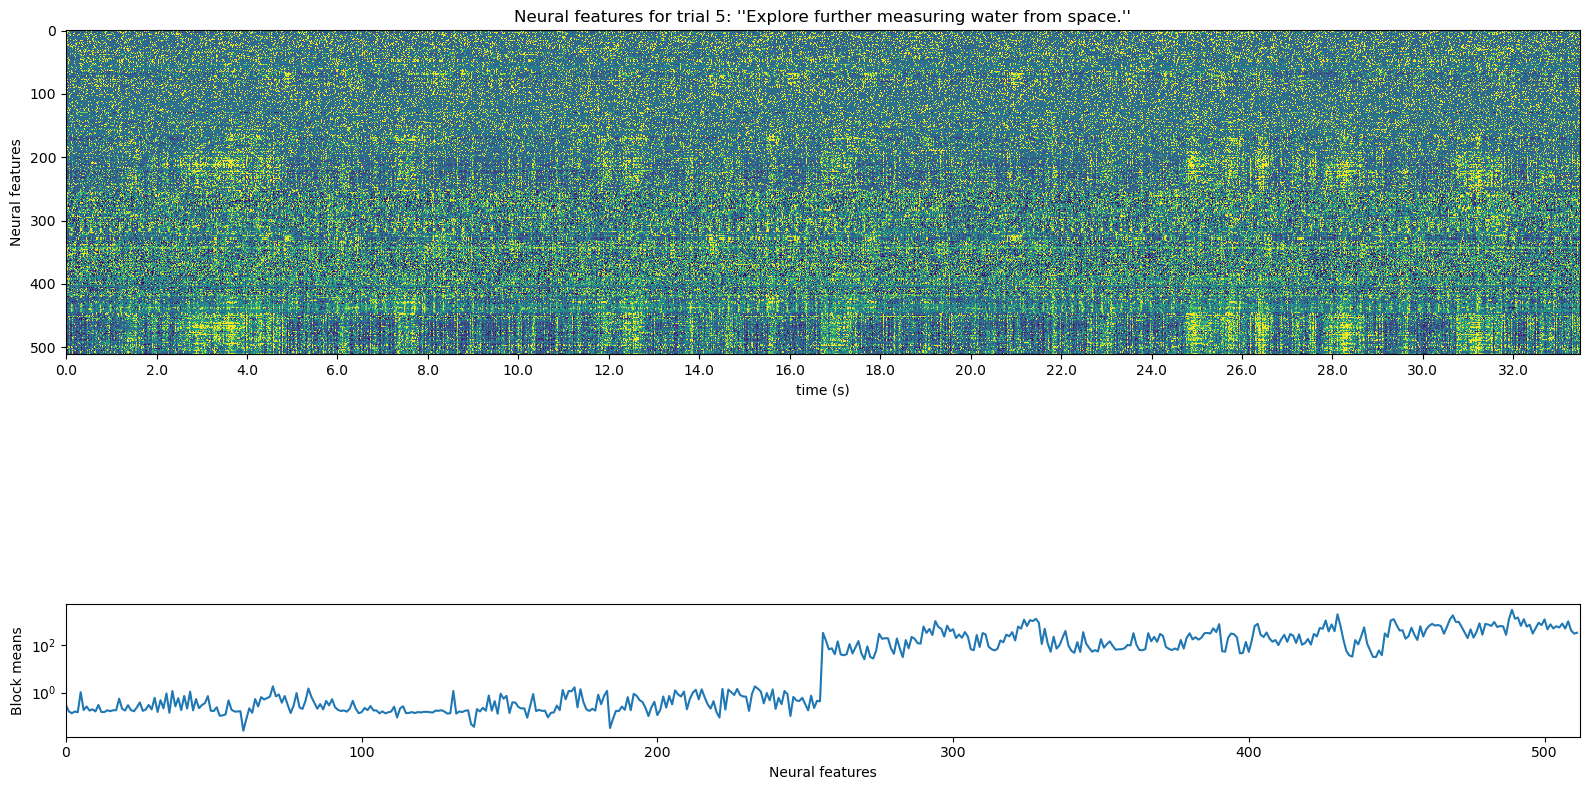

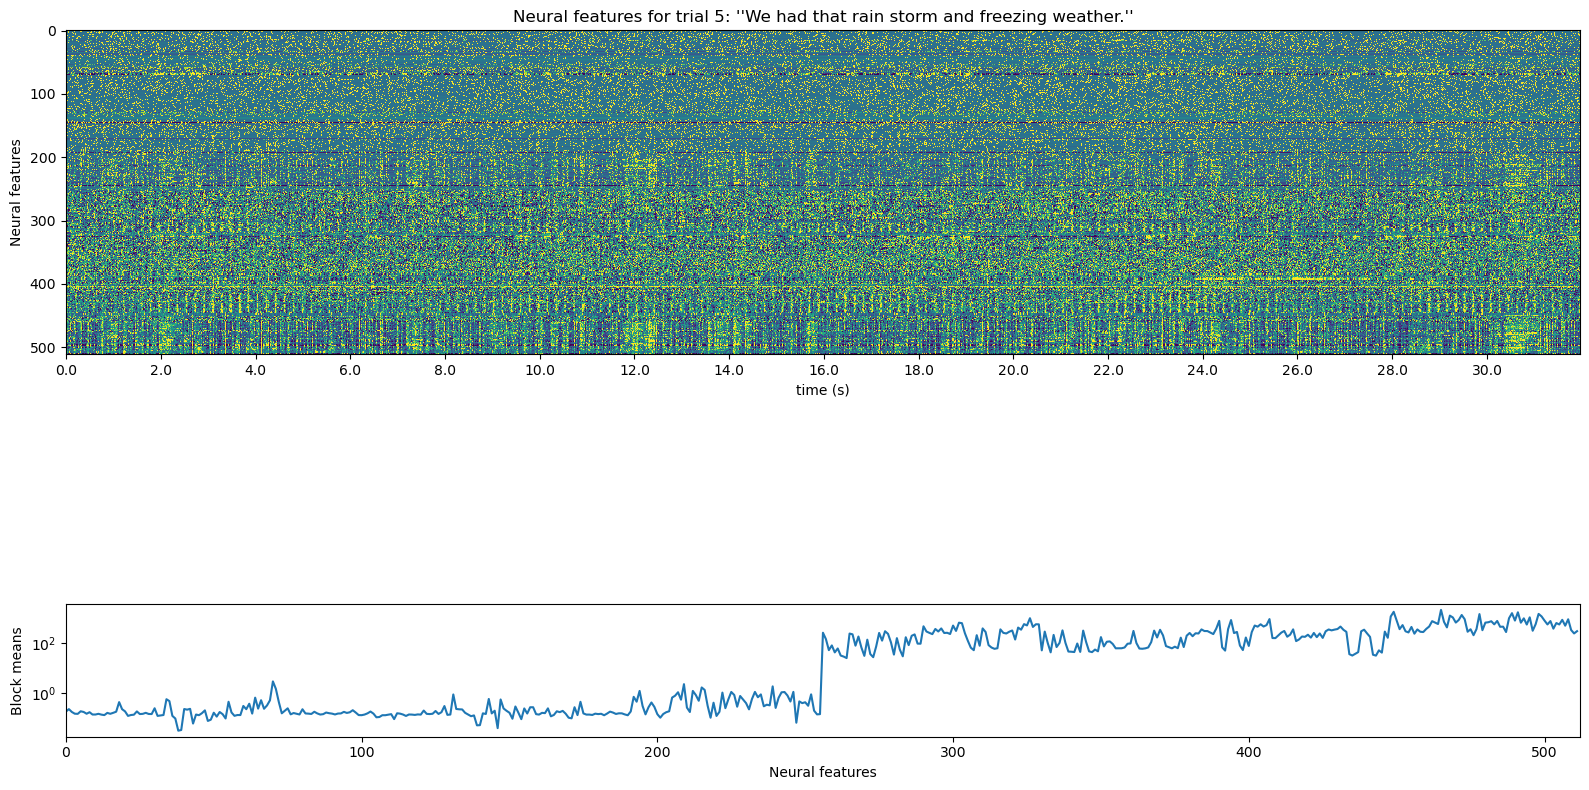

In [1]:
import sys
sys.path.append('../')
import utils.mat_to_tfrecord
from pathlib import Path
import numpy as np

from T17_SessionArgs import get_session_info


sessions = [
    't17.2024.06.13',
    't17.2024.07.09',
    't17.2024.07.10',
    't17.2024.07.22',
     ]

participant = 't17'
bin_compression_factor = 2
channels_to_exclude = list(range(128,256))
channels_to_zero = list(range(0,0)) 

for session in sessions:
    
    trials_to_remove, block_nums, num_test_trials = get_session_info(session)
    session_path = str(Path('../Data', participant, session, 'Typing'))
    tfdata_path = str(Path(session_path, 'tfdata_20ms'))

    print(f'Sesison path: {session_path}')
    print(f'tfdata path: {session_path}')
    print('\n')

    args = {
        'session_mat_path': session_path,
        'block_nums': block_nums,
        'num_test_trials': num_test_trials,
        'trials_to_remove': trials_to_remove,
        'channels_to_exclude': channels_to_exclude,
        'channels_to_zero': channels_to_zero,
        'include_thresh_crossings': True,
        'include_spike_power': True,
        'spike_pow_max': 50000,
        'z_score_data': True,
        'global_std': True,
        'bin_compression_factor': bin_compression_factor,
        'save_path': tfdata_path,
    }

    utils.mat_to_tfrecord.main(args)

## Train the decoder. Remember to Restart the notebook first!

In [1]:
from omegaconf import OmegaConf
import sys
sys.path.append('../')
from utils.brainToText_trainDecoder import brainToText_decoder

args = OmegaConf.load('T17_trainArgs.yaml')

decoder = brainToText_decoder(args)

infOut, stats = decoder.train()

2025-08-16 16:31:04.714480: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 16:31:04.736255: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-16 16:31:04.736271: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-16 16:31:04.736298: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-16 16:31:04.741234: I tensorflow/core/platform/cpu_feature_g

2025-08-16 16:31:05,725: Using GPU #: 0


2025-08-16 16:31:05.738243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-16 16:31:05.779233: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-16 16:31:05.779387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 multiple                  13372416  
                                                                 
 gru_2 (GRU)                 multiple                  1575936   
                                                                 
 gru_3 (GRU)                 multiple                  1575936   
                                                                 
 gru_4 (GRU)                 multiple                  1575936   
                                                                 
 gru_5 (GRU)                 multiple                  1575936   
                                                                 
 dense (Dense)               multiple                  15903     
                                                                 
Total params: 19692575 (75.12 MB)
Trainable params: 19692575 (7

2025-08-16 16:31:12.074618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-08-16 16:31:12.337925: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7551b277c170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-16 16:31:12.337944: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-08-16 16:31:12.340458: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-16 16:31:12.391699: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2025-08-16 16:31:13,237: Train batch 0: loss: 112.46 gradNorm: 332.36 
2025-08-16 16:31:13,305: Val batch: CER (t17.2024.06.13): 0.471
2025-08-16 16:31:13,351: Val batch: CER (t17.2024.07.09): 0.261
2025-08-16 16:31:13,406: Val batch: CER (t17.2024.07.10): 0.221
2025-08-16 16:31:13,457: Val batch: CER (t17.2024.07.22): 0.295
2025-08-16 16:31:13,458: Val batch 0: CER (avg): 0.303 
2025-08-16 16:31:13,802: Model checkpoint saved to: t17latencies/
2025-08-16 16:31:13,804: Saved training args.yaml to: t17latencies/
2025-08-16 16:31:13,805: Batches since validation CER improved: 0
2025-08-16 16:31:13,989: Train batch 1: loss: 99.29 gradNorm: 293.62 
2025-08-16 16:31:14,799: Train batch 2: loss: 47.71 gradNorm: 121.14 
2025-08-16 16:31:14,979: Train batch 3: loss: 81.41 gradNorm: 230.78 
2025-08-16 16:31:15,490: Train batch 4: loss: 71.48 gradNorm: 154.24 
2025-08-16 16:31:15,664: Train batch 5: loss: 66.62 gradNorm: 155.80 
2025-08-16 16:31:16,224: Train batch 6: loss: 136.76 gradNorm: 202.

In [1]:
from omegaconf import OmegaConf
import sys
sys.path.append('../')
from utils.brainToText_trainDecoder import brainToText_decoder

args = OmegaConf.load('T17_trainArgs.yaml')

decoder = brainToText_decoder(args)
out, out_by_day = decoder.inference()

2025-08-16 16:47:34.619311: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-16 16:47:34.641913: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-16 16:47:34.641932: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-16 16:47:34.641962: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-16 16:47:34.647262: I tensorflow/core/platform/cpu_feature_g

2025-08-16 16:47:35,628: Using GPU #: 0


2025-08-16 16:47:35.640972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-16 16:47:35.683665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-16 16:47:35.683820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 multiple                  13372416  
                                                                 
 gru_2 (GRU)                 multiple                  1575936   
                                                                 
 gru_3 (GRU)                 multiple                  1575936   
                                                                 
 gru_4 (GRU)                 multiple                  1575936   
                                                                 
 gru_5 (GRU)                 multiple                  1575936   
                                                                 
 dense (Dense)               multiple                  15903     
                                                                 
Total params: 19692575 (75.12 MB)
Trainable params: 19692575 (7

2025-08-16 16:47:37.897874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600


2025-08-16 16:47:38,442: Val batch: CER (t17.2024.07.09): 0.004
2025-08-16 16:47:38,544: Val batch: CER (t17.2024.07.10): 0.011
2025-08-16 16:47:38,828: Val batch: CER (t17.2024.07.22): 0.008


In [29]:
import pickle
import numpy as np
initial_window = 16 * 20
slide_size = 9 * 20
latencies = {}
CHAR_DEF = [
    '>', ',', '?', '.',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 
    'H', 'I', 'J', 'K', 'L', 'M', 'N', 
    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
    'V', 'W', 'X', 'Y', 'Z','blank']
print(out.keys())
for sentence in out['logits']:
    decoded_classes = np.argmax(sentence,-1)
    i = 0
    while decoded_classes[i] == 30:
        i+=1
    first_letter = CHAR_DEF[decoded_classes[i]]
    latency = initial_window + slide_size * (i-1)

    if first_letter not in latencies:      
        latencies[first_letter] = [latency]
    else:
        latencies[first_letter].append(latency)
with open('t17_latencies.pkl', 'wb') as f:
    pickle.dump(latencies, f)

dict_keys(['logits', 'logitLengths', 'decodedSeqs', 'editDistances', 'trueSeqLengths', 'trueSeqs', 'transcriptions', 'seqErrorRate', 'seqErrorRateIndividual', 'dayVal', 'per'])
